# TEST - Claro loop + fit

In [1]:
from claro_fit import *
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
a = fileinfo('C:\\Users\\MARTINA\\Desktop\\secondolotto_1\\', custom_n_files='all', log=False)

The default subfolders' paths are *Station_1__*\Station_1__??_Summary\Chip_???\S_curve.
The default file names are Ch_*_offset_*_Chip_*.txt.
To confirm, press Enter. Press any other key to change the paths.
 


Processing file n. 41461...n: C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__36\Station_1__36_Summary\Chip_180\S_curve\Ch_0_offset_0_Chip_180.txt. First word: error. Going on....

Process completed in 48.01 s.

Total number of files found: 41461.
Total number of good files: 40911. Output paths to good files are stored in claro_files.txt
Total number of bad files: 550 (1.3%) out of total). Output paths to bad files are stored in bad_files.txt


In [3]:
fileinfo_find(a, chip='001', ch='1')

{'path': 'C:\\Users\\MARTINA\\Desktop\\secondolotto_1\\Station_1__11\\Station_1__11_Summary\\Chip_001\\S_curve\\Ch_1_offset_0_Chip_001.txt',
 'station': '1',
 'sub': '11',
 'chip': '001',
 'ch': '1',
 'offset': '0',
 'amplitude': 1000.07304,
 'transition': 233.74269,
 'width': -1.841865}

In [5]:
# Loop on the files and print plots on multi-page pdf

custom_n_files = 100     # This is used to break the printing of plots: comment the line
                        # or assign to 'all' to plot all the files

log_choice = False
save_choice = False
save_path = 'aHundredPlots.pdf'

# Histograms of transition points and widths
tw_hist = True # Choose True or False for plotting, showing and saving
t_list = []
w_list = []

with PdfPages(save_path) as pdf:
    
    per_page = int(input("How many plots do you want per page? Allowed values are 1,2,3,4,6. "))
    if per_page==1: nrows, ncols = 1, 1
    elif per_page==2: nrows, ncols = 2, 1
    elif per_page==3: nrows, ncols = 3, 1
    elif per_page==4: nrows, ncols = 2, 2
    elif per_page==6: nrows, ncols = 3, 2
    else: raise NameError("Please run again and choose one of the allowed number of subplots.")
    
    for n, file in enumerate(a.values()): # file is the sub-dict, access keys via file['key']

        # Preprocessing
        print(f"Reading file n. {n}...", end='\r')
        x,y,meta = read_data(file['path'])
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            metafit = fit_erf(x,y,meta, interactive=False, log=log_choice)

        meta['fit_dict'] = metafit
        
        # Building histogram of transition points and widths
        t_list.append(meta['transition'])
        w_list.append(meta['width'])
        
        # Plotting and saving on multipage pdf
        if isinstance(custom_n_files,int):
            if n>=custom_n_files: continue
        index = n%per_page+1
        if index==1:
            fig=plt.figure(figsize=(10,15)) 
        fig.add_subplot(nrows,ncols,index)
        plot_fit(x, y, metafit, fileinfo=file, show=True, save=False, log=log_choice)
        if index==per_page or n==len(a.values())-1:
            if save_choice: pdf.savefig(fig)
            plt.close(fig)
    plt.close()

How many plots do you want per page? Allowed values are 1,2,3,4,6.  6


In [129]:
def hist_tw(t_list, w_list, ax):
    
    import scipy.stats as ss
    from matplotlib.ticker import MaxNLocator
    
    # Gaussian fit
    # for data in [w_list, t_list]:
        # x_grid = list(range(min(data),max(data),(max(data)-min(data))/1000))
        # mu, sigma = scipy.stats.norm.fit(data)
        # best_fit = scipy.stats.norm.pdf(bins, mu, sigma)
    
    annotation_kwargs = {'xy':(.1,.9), 'xycoords':'axes fraction',
                         'bbox':dict(boxstyle="round",edgecolor="black",facecolor="white",alpha=.8)}
    
    # Transition histogram
    ax[0].set_title("Transition points' histogram", fontsize=12)
    ax[0].tick_params(axis='y', which='minor', width=0)
    ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Widths' histogram
    ax[1].set_title("Widths' histogram", fontsize=12)
    ax[1].tick_params(axis='y', which='minor', width=0)
    ax[1].yaxis.set_major_locator(MaxNLocator(integer=True))

    # Gaussian fit
    # Un-normalized gaussian is given multiplying pdf by integral of histogram
    for n, data in enumerate([t_list, w_list]):
        counts, bins, pads = ax[n].hist(data, bins=int(np.sqrt(len(data))/4), density=False,
                                    color='green', label='Transition points (x)', alpha=1,
                                    log=False, rwidth=1)
        mu, sigma = ss.norm.fit(data)
        x = np.linspace(min(data), max(data), 1000)
        fit = ss.norm.pdf(x, mu, sigma)*len(data)*(bins[1]-bins[0])
        ax[n].plot(x, fit)
        ax[n].annotate(f"N entries: {len(data)}\n"\
                       +"Mean: {:.2f}\n".format(mu)\
                       +"Dev: {:.2f}\n".format(sigma),
                       **annotation_kwargs)
    

    # n, wbins, pads = ax[1].hist(w_list, bins=int(np.sqrt(len(w_list))/4), 
    #            color='orange', label='Widths', alpha=1, log=True, 
    #            rwidth=1)
    # ax[1].annotate(f"N entries: {len(t_list)}", **annotation_kwargs)

In [272]:
def hist_tw(t_list, w_list, ax):
    
    import scipy.stats as ss
    from matplotlib.ticker import MaxNLocator
    
    annotation_kwargs = {'xy':(.1,.5), 'xycoords':'axes fraction',
                         'bbox':dict(boxstyle="round",edgecolor="black",facecolor="white",alpha=.8)}
    
    # Transition histogram
    ax[0].set_title("Transition points' histogram", fontsize=12)
    ax[0].tick_params(axis='y', which='minor', width=0)
    ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
    counts, bins, pads = ax[0].hist(t_list, bins=int(np.sqrt(len(t_list))/4), density=False,
                                color='green', label='Transition points (x)', alpha=1,
                                log=False, rwidth=1)
    
    # Gaussian fit for transition widths
    # Un-normalized gaussian is given multiplying pdf by integral of histogram
    par = ss.norm.fit(t_list)
    x = np.linspace(min(t_list), max(t_list), 1000)
    fit = ss.norm.pdf(x, *par)*len(t_list)*(bins[1]-bins[0])
    ax[0].plot(x, fit)
    
    ax[0].annotate(f"N entries: {len(t_list)}\n"\
                   +"Fit type: norm\n"\
                   +"Mean: {:.2f}\n".format(par[0])\
                   +"Dev: {:.2f}".format(par[1]),
                   **annotation_kwargs)
    
    #-----------------------------------------    
    # Widths' histogram
    ax[1].set_title("Widths' histogram", fontsize=12)
    ax[1].tick_params(axis='y', which='minor', width=0)
    ax[1].yaxis.set_major_locator(MaxNLocator(integer=True))
    counts, bins, pads = ax[1].hist(w_list, bins=int(np.sqrt(len(w_list))/4), density=False,
                            color='green', label='Transition points (x)', alpha=1,
                            log=False, rwidth=1)
    ax[1].set_ylim(1,max(counts))
    # Gaussian fit for transition widths
    # Un-normalized gaussian is given multiplying pdf by integral of histogram
    par = ss.lognorm.fit(w_list)
    x = np.linspace(min(w_list), max(w_list), 1000)
    fit = ss.lognorm.pdf(x, *par)*len(w_list)*(bins[1]-bins[0])
    ax[1].plot(x, fit)
    print(*par)
    
    ax[1].annotate(f"N entries: {len(w_list)}\n"\
                   +"Fit type: lognorm\n"\
                   +"Mean: {:.2f}\n".format(par[2])\
                   +"Dev: {:.2f}".format(par[0]),
                   **annotation_kwargs)

0.2214441273037106 -0.18311445623608408 1.6975366281092232


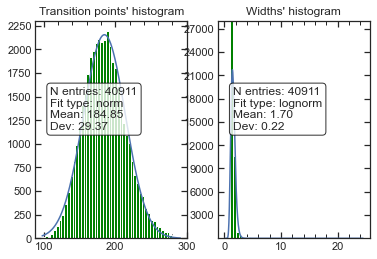

In [273]:
# Histograms of transition points and widths
fig, ax = plt.subplots(nrows=1, ncols=2)
hist_tw(t_list, w_list, ax)
plt.savefig('Hist_tw.pdf')

In [267]:
import statistics as stat
stat.mode(w_list)

1.474391

## Support cells